# Memprediksi Jenis Kelamin dari Nama Bahasa Indonesia dengan Machine Learning

Import some basic libraries.
* Pandas - provided data frames
* matplotlib.pyplot - plotting support

Use Magic %matplotlib to display graphics inline instead of in a popup window.

In [399]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data

%matplotlib inline

### Loading and Reviewing the Data

In [430]:
df = pd.read_csv("./data/data-pemilih-kpu.csv", encoding = 'utf-8-sig')

In [431]:
df.shape

(13137, 2)

In [432]:
df.head(5)

,nama,jenis_kelamin
0,ERWIN TJAHJONO,Laki-Laki
1,DAVIANDRIE ANDIKA BAHROENY,Laki-Laki
2,ELAN KURNIAWAN,Laki-Laki
3,AYU DWI CAHYANING MUKTI,Perempuan
4,WAHYOEDIN,Laki-Laki


In [433]:
df.tail(5)

,nama,jenis_kelamin
13132,HERMANSYAH,Laki-Laki
13133,SITA.HJ,Perempuan
13134,MASNI TAMBUNAN,Perempuan
13135,MARJANEDI,Laki-Laki
13136,NGALIMAN,Laki-Laki


In [434]:
df.isnull().values.any()

True

### Check Null Rows

In [435]:
len(df[pd.isnull(df).any(axis=1)])

187

### Drop null records and recheck

In [436]:
df = df.dropna(how='all')

In [437]:
len(df[pd.isnull(df).any(axis=1)])

0

In [438]:
df.shape

(12950, 2)

### Change Jenis from text to integer, True=1, False=0

In [440]:
jk_map = {"Laki-Laki" : 1, "Perempuan" : 0}
df["jenis_kelamin"] = df["jenis_kelamin"].map(jk_map)

In [441]:
df.head(5)

,nama,jenis_kelamin
0,ERWIN TJAHJONO,1
1,DAVIANDRIE ANDIKA BAHROENY,1
2,ELAN KURNIAWAN,1
3,AYU DWI CAHYANING MUKTI,0
4,WAHYOEDIN,1


### Checking data distribution

In [442]:
num_obs = len(df)
num_true = len(df.loc[df['jenis_kelamin'] == 1])
num_false = len(df.loc[df['jenis_kelamin'] == 0])
print("Number of Pria:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of Wanita: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of Pria:  6162 (47.58%)
Number of Wanita: 6788 (52.42%)


### Spliting the data 

70% for training, 30% for testing

In [443]:
from sklearn.cross_validation import train_test_split

feature_col_names = ["nama"]
predicted_class_names = ["jenis_kelamin"]

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

text_train, text_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, stratify=y, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

### Let's check the data distribution

In [445]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['jenis_kelamin'] == 1]), (len(df.loc[df['jenis_kelamin'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['jenis_kelamin'] == 0]), (len(df.loc[df['jenis_kelamin'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 6162 (47.58%)
Original False : 6788 (52.42%)

Training True  : 4313 (47.58%)
Training False : 4752 (52.42%)

Test True      : 1849 (47.59%)
Test False     : 2036 (52.41%)


### Features Extraction

In [446]:
from sklearn.feature_extraction.text import CountVectorizer

print('CountVectorizer defaults')

vectorizer = CountVectorizer()
vectorizer.fit(text_train.ravel())

X_train = vectorizer.transform(text_train.ravel())
X_test = vectorizer.transform(text_test.ravel())

CountVectorizer defaults


In [448]:
print(X_train.shape)
print(X_test.shape)

(9065, 8676)
(3885, 8676)


In [449]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Precision Score

In [450]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.982680639823
0.822908622909


In [451]:
import numpy as np

def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(50), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 51), feature_names[interesting_coefficients], rotation=60, ha="right");

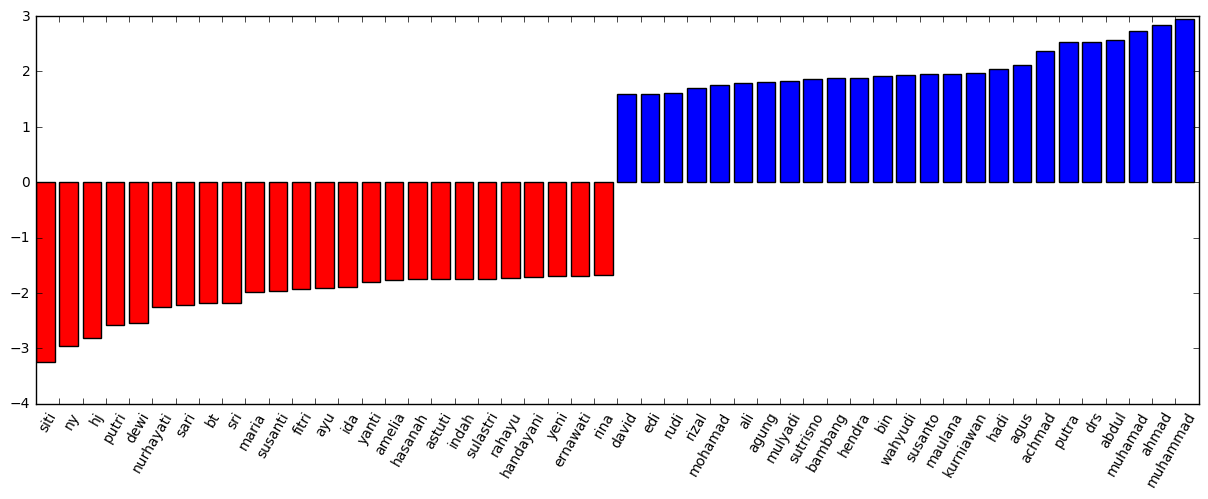

In [452]:
visualize_coefficients(clf, vectorizer.get_feature_names())

In [453]:
clf_predict = clf.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, clf_predict)))
print(metrics.confusion_matrix(y_test, clf_predict, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, clf_predict, labels=[1,0]))

Accuracy: 0.8229
[[1269  580]
 [ 108 1928]]

Classification Report
             precision    recall  f1-score   support

          1       0.92      0.69      0.79      1849
          0       0.77      0.95      0.85      2036

avg / total       0.84      0.82      0.82      3885



In [473]:
test_predict = vectorizer.transform(["febiyan"])
res = clf.decision_function(test_predict)
print(res)
if(res > 0):
    res = 1
else:
    res = 0

jk_label = {1:"Laki-Laki", 0:"Perempuan"}
print(jk_label[int(res)])

[-0.12861991]
Perempuan


### Naive Bayes



In [474]:
from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB().fit(X_train, y_train.ravel())

print(clf_nb.score(X_train, y_train))
print(clf_nb.score(X_test, y_test))

0.981025923883
0.829601029601


In [475]:
clf_nb_predict = clf_nb.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, clf_nb_predict)))
print(metrics.confusion_matrix(y_test, clf_nb_predict, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, clf_nb_predict, labels=[1,0]))

Accuracy: 0.8296
[[1292  557]
 [ 105 1931]]

Classification Report
             precision    recall  f1-score   support

          1       0.92      0.70      0.80      1849
          0       0.78      0.95      0.85      2036

avg / total       0.85      0.83      0.83      3885



In [490]:
test_predict = vectorizer.transform(["tasya"])
res = clf_nb.predict(test_predict)
print(res)

[0]


### RandomForest

In [479]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier (n_estimators=50, min_samples_split=6)
clf_rf.fit(X_train, y_train.ravel())

print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

0.987865416437
0.778635778636


In [480]:
clf_rf_predict = clf_rf.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, clf_rf_predict)))
print(metrics.confusion_matrix(y_test, clf_rf_predict, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, clf_rf_predict, labels=[1,0]))

Accuracy: 0.7786
[[1728  121]
 [ 739 1297]]

Classification Report
             precision    recall  f1-score   support

          1       0.70      0.93      0.80      1849
          0       0.91      0.64      0.75      2036

avg / total       0.81      0.78      0.77      3885



In [489]:
test_predict_rf = vectorizer.transform(["tasya"])
res_rf = clf_rf.predict(test_predict_rf)
print(res_rf)

[0]
